# Predicting gentrification in Chicago
*Midpoint Report by The Binary Beasts*

In this preliminary report, we concentrated on collecting data from the Census Bureau and running a model that could predict gentrification based on basic sociodemographic variables. For the next deriverable, we expect to incorporate more variables related to the actual link between the presence of environmental resources, such as
park and garden facilities, natural features, and air pollution, and increased susceptibility to  gentrification. As discussed in our literature review, our exact research questions will depend on the specifics of our data, namely if we can locate data corresponding to the construction or enhancement of parks, etc. In that case, we would like to draw out the effect of new environmental access on gentrification, returning to the idea of “green gentrification” discussed earlier. If we can only find static data on parks, we can still look at how their presence impacts the model of gentrification risk by comparing socioeconomic change over time in areas with or without these resources.

### Data Collection

For this report we defined our outcome variable as...

In the same way, for this midpoint we integrated the following variables as possible features:
* Percentage of the population who is white
* Percentage of the population with high school education
* Employment rate (as percentage)

Note: we also have their respective changes over time

### Exploring the dataset

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn as sk 
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [63]:
# Import dataset

df = pd.read_csv('data_collection/output_dataset.csv')
df['year'] = pd.to_numeric(df['year'])
df.columns

Index(['zip code tabulation area', 'year', 'med_income', 'med_home_val',
       'med_rent', 'perc_white', 'med_age', 'perc_employed', 'perc_hs_grad',
       'med_income_change', 'med_home_val_change', 'med_rent_change',
       'med_age_change', 'perc_white_change', 'perc_hs_grad_change',
       'perc_employed_change'],
      dtype='object')

**Outcome variable**

**Features**

In [64]:
features = df[df['year'] > 2012]
features = features[['perc_white', 'perc_employed', 'perc_hs_grad', 'perc_white_change', 'med_age_change', 'perc_employed_change', 'year', 'zip code tabulation area']]

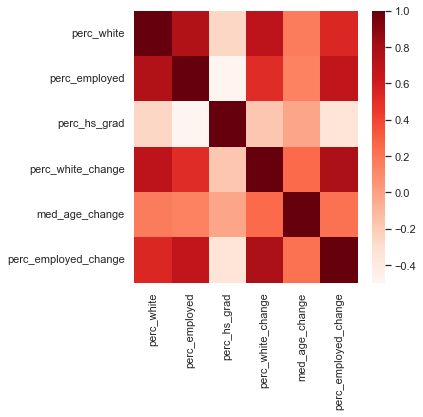

In [65]:
# Correlation matrix
cor_df = features[['perc_white', 'perc_employed', 'perc_hs_grad', 'perc_white_change', 'med_age_change', 'perc_employed_change']]
corr_matrix = cor_df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=False, cmap=plt.cm.Reds)
plt.show()

year
2013    0.615096
2014    0.614727
2015    0.611336
2016    0.609557
2017    0.604979
2018    0.602914
2019    0.600298
Name: perc_white, dtype: float64


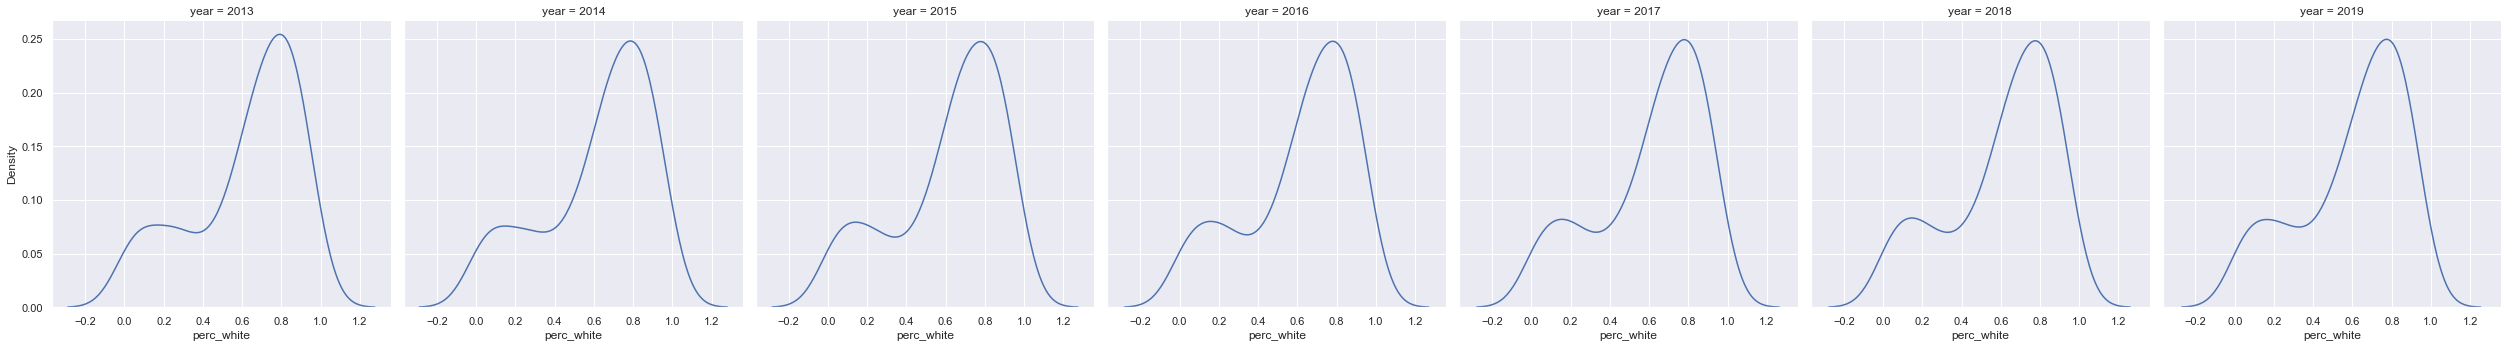

In [66]:
# Percentage of the population who is white
print(features.groupby('year').mean()['perc_white'])
sns.set_theme()
sns.displot(data=features, x="perc_white", col="year", kind="kde")

year
2013    0.208010
2014    0.207445
2015    0.205875
2016    0.203436
2017    0.201324
2018    0.199518
2019    0.198557
Name: perc_hs_grad, dtype: float64


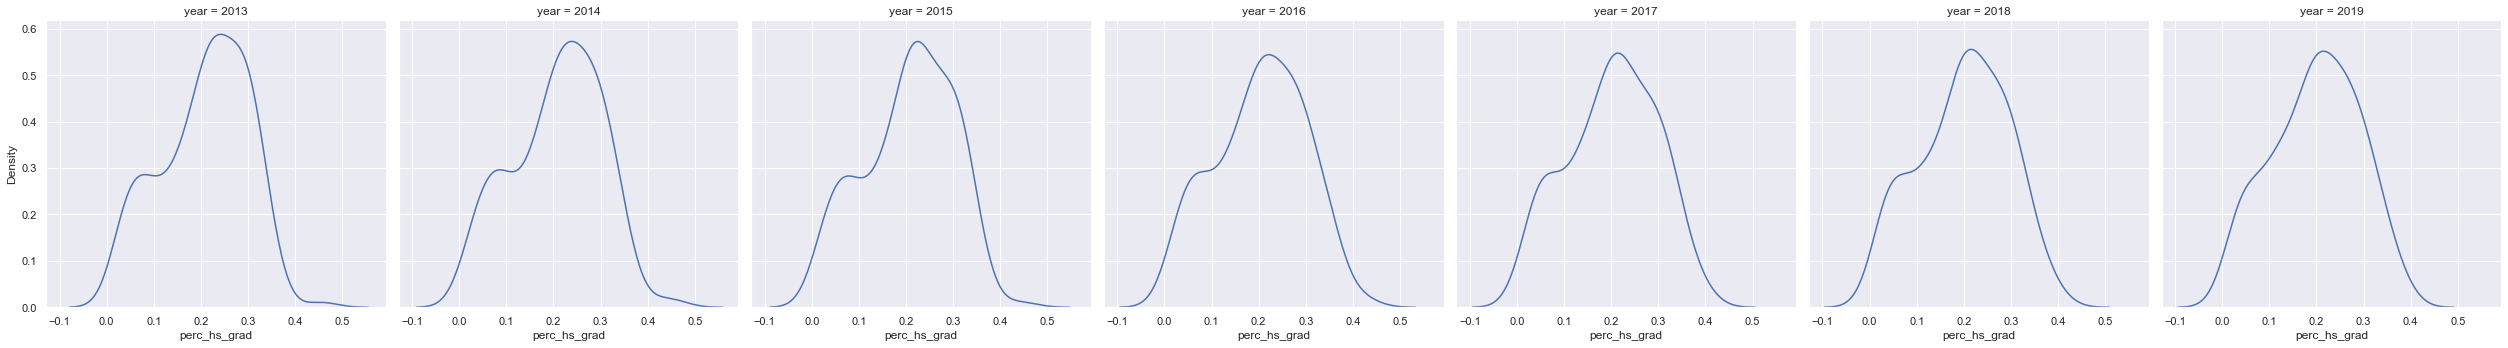

In [67]:
# Percentage of the population with high school education
print(features.groupby('year').mean()['perc_hs_grad'])
sns.set_theme()
sns.displot(data=features, x="perc_hs_grad", col="year", kind="kde")

year
2013    0.884283
2014    0.888973
2015    0.897101
2016    0.907620
2017    0.913036
2018    0.921686
2019    0.930044
Name: perc_employed, dtype: float64


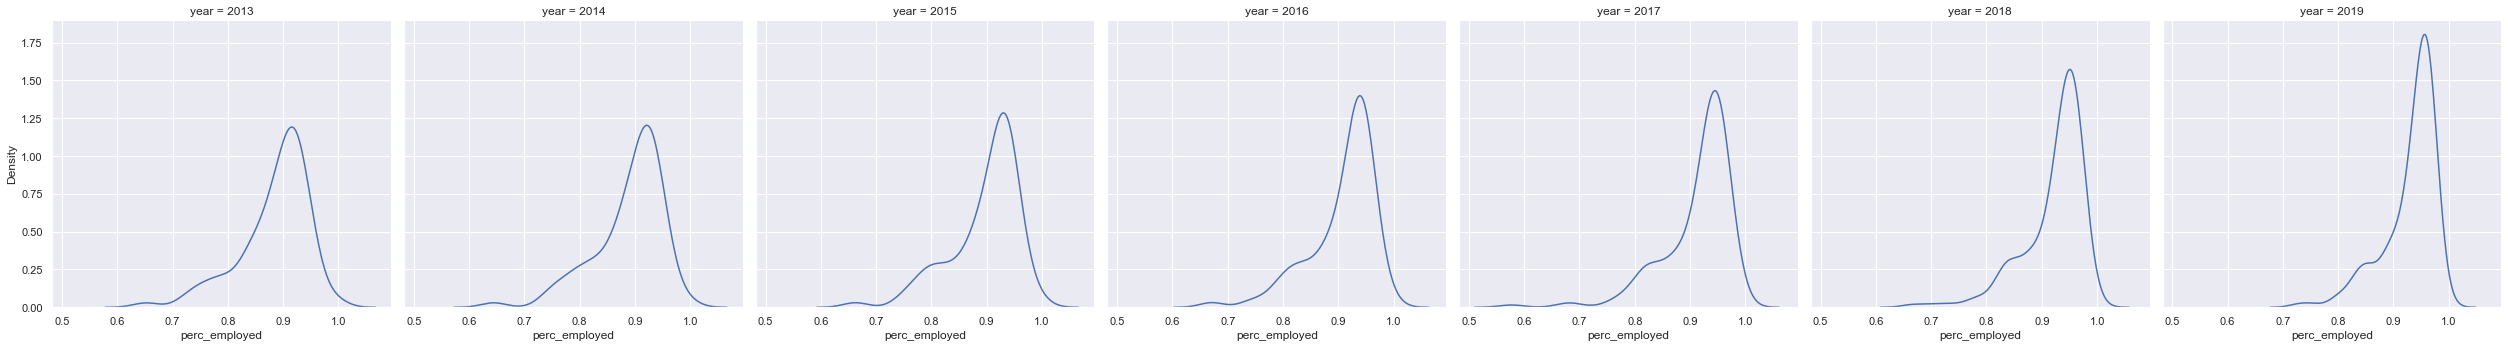

In [68]:
# Employment rate (as percentage)
print(features.groupby('year').mean()['perc_employed'])
sns.set_theme()
sns.displot(data=features, x="perc_employed", col="year", kind="kde")

### Logistic regression
Our first step is to create the Y variable, which is based off the Chicago ARO definition of a Community preservation areas: communities that may or may not be high-cost or lowaffordability currently, but which are experiencing or are at high risk of experiencing
displacement of existing low-income residents.

In [72]:
gent_zips = ["60626", "60640", "60625", "60630", "60618", "60641", "60647", "60639", "60651", "60612", "60622", "60624", "60608", "60616", "60637", "60653", "60609", "60641"]
gent_zips_num = [float(x) for x in gent_zips]

df['gentrifying'] = [1 if row[1]['zip code tabulation area'] in gent_zips_num else 0 for row in df.iterrows() ]
features = df[['perc_white', 'perc_employed', 'perc_hs_grad', 'perc_white_change', 'med_age_change', 'perc_employed_change', 'year', 'zip code tabulation area']]

Model = LogisticRegression().fit(features,df['gentrifying'])
params = pd.DataFrame(zip(features.columns, np.transpose(Model.coef_)), columns=['features', 'coef']) 
print(params)


# x_train, y_train, x_test, y_test = sk.pre





                   features                       coef
0                perc_white     [-0.00463826799363702]
1             perc_employed   [-0.0008033524098532136]
2              perc_hs_grad   [0.00016003467199656672]
3         perc_white_change   [-0.0028578365580843906]
4            med_age_change   [-0.0033597958709260505]
5      perc_employed_change  [-0.00043457099538728134]
6                      year     [-0.20653326852672169]
7  zip code tabulation area     [0.006840294995122302]
